In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#unix timestampek rosszak
#nem tudom melyik óra hol mi nem egyeznek a time stampek sem, néhol ismételt timestampek
#napok árakban is nagy eltérések vannak
#cexio tűnik egyetlen precíznek azok közül ahol van adat régóta és ~ megegyezik google live értékeivel (yahoo?)
#first planned timestamp: 2015/09/23 0:00

#gemini exmo off




In [4]:
btc_usd = pd.read_csv("data/BTC_USD Binance Historical Data.csv", thousands=',')[::-1]
eth_usd = pd.read_csv("data/ETH_USD Binance Historical Data.csv", thousands=',')[::-1]


eur_usd = pd.read_csv("data/EUR_USD Historical Data.csv", thousands=',')[::-1]
gold_usd = pd.read_csv("data/XAU_USD Historical Data.csv", thousands=',')[::-1]
real_estate_usd = pd.read_csv("data/Real Estate Historical Data.csv", thousands=',')[::-1]
nyse_usd = pd.read_csv("data/NYSE Composite Historical Data.csv", thousands=',')[::-1]


In [5]:
raw_data = (btc_usd,eth_usd,eur_usd,gold_usd,real_estate_usd,nyse_usd)
exchange_rates_names = ["BTC","ETH","EUR","Gold","RealEstate","NYSE"]

cryptos = ["BTC","ETH"]

column_of_interest = 'Open'

for df in raw_data:
    df["Date"] = pd.to_datetime(df["Date"])

mutual = None

for idx in range(0,len(raw_data)):
    right_df = raw_data[idx]

    unique_name = f"{column_of_interest}_{exchange_rates_names[idx]}"

    right_df.rename(columns={column_of_interest : unique_name },inplace=True)
    right_df.drop(columns=[col for col in right_df.columns if col not in ["Date",unique_name]], inplace=True)

    if mutual is None:
        mutual = right_df
    else:
        mutual = mutual.merge(right=right_df,on="Date",how="outer")


In [6]:

mutual.sort_values(by="Date",inplace=True)
mutual.reset_index(inplace=True,drop=True)


for col in mutual.columns:
    if col.split("_")[-1] in cryptos:
        mutual[col].fillna(0,inplace=True)
    elif col != "Date":
        mutual[col] = pd.to_numeric(mutual[col]).astype(np.float64)
        mutual[col].interpolate(method='polynomial', order = 2, inplace=True)

mutual.dropna(inplace=True)


In [7]:
mutual = mutual[mutual["Open_BTC"] != 0]
mutual.reset_index(inplace=True, drop=True)
mutual["day_number"] = mutual.index
if "Date" in mutual.columns:
    mutual.drop("Date",inplace=True,axis=1)
mutual["BTC_delta"] = mutual["Open_BTC"] - mutual["Open_BTC"].shift(1)
mutual

,Open_BTC,Open_ETH,Open_EUR,Open_Gold,Open_RealEstate,Open_NYSE,day_number,BTC_delta
0,4386.7,0.00,1.197800,1317.750000,735.060000,11733.800000,0,NaN
1,4587.5,0.00,1.197400,1309.260000,740.520000,11783.400000,1,200.8
2,4555.1,0.00,1.188400,1308.800000,744.620000,11833.900000,2,-32.4
3,4724.9,0.00,1.191100,1321.800000,743.290000,11898.000000,3,169.8
4,4834.9,0.00,1.190993,1330.801901,741.324566,11938.060484,4,110.0
...,...,...,...,...,...,...,...,...
1777,20856.0,1168.06,1.017300,1742.860000,668.200000,14642.300000,1777,-735.6
1778,19952.7,1095.73,1.004000,1733.990000,650.630000,14502.400000,1778,-903.3
1779,19349.6,1039.72,1.004000,1726.170000,661.500000,14395.000000,1779,-603.1
1780,20235.8,1114.20,1.006100,1735.700000,660.140000,14340.300000,1780,886.2


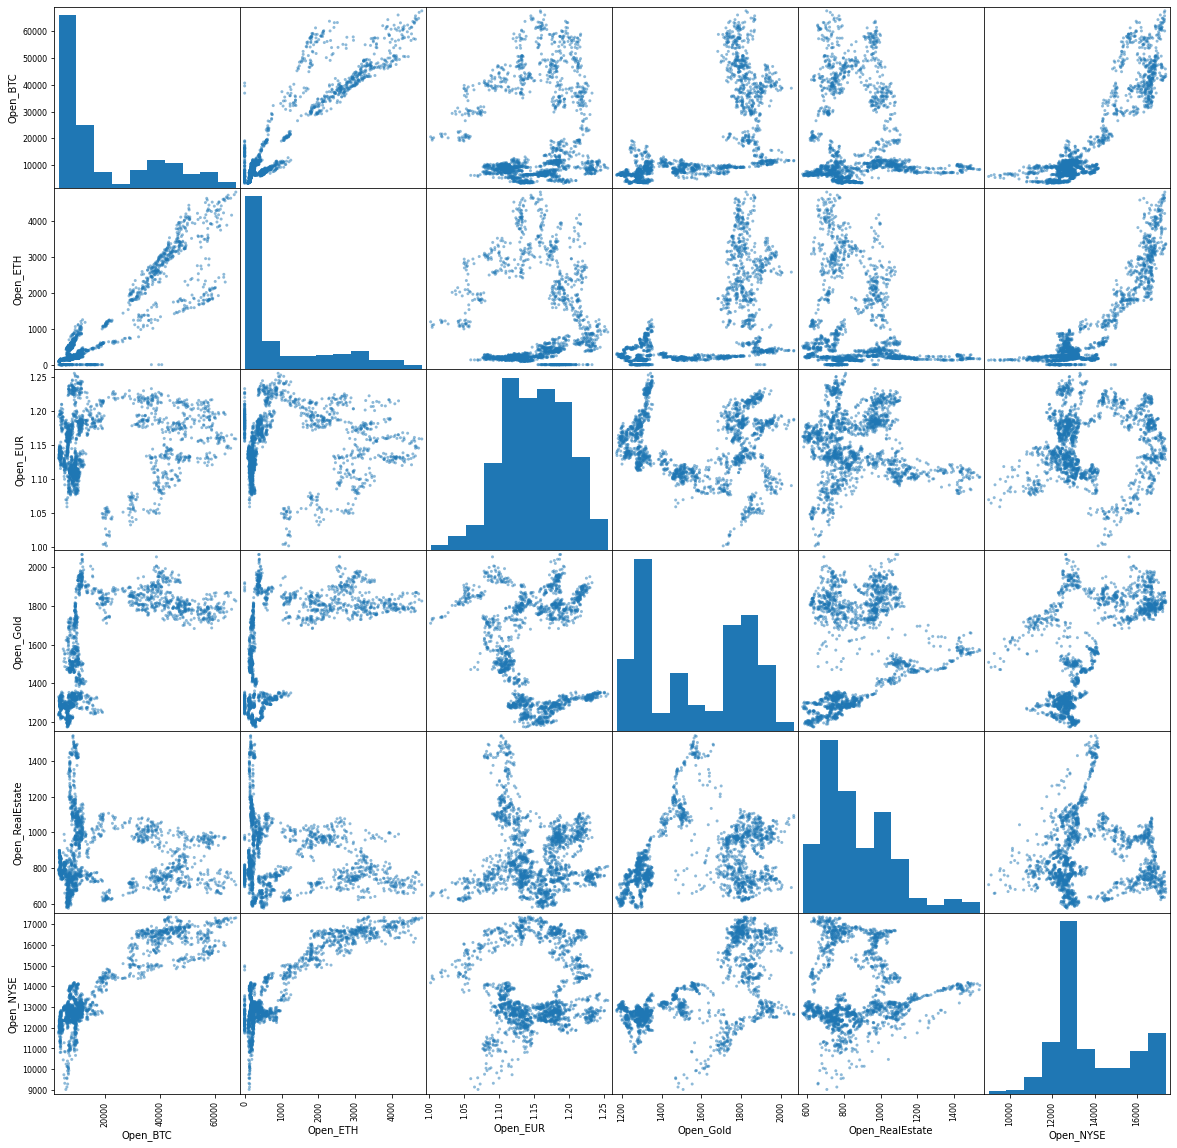

In [8]:
from pandas.plotting import scatter_matrix

scatter_matrix(mutual[["Open_BTC","Open_ETH","Open_EUR","Open_Gold","Open_RealEstate","Open_NYSE"]], figsize=(20,20))
plt.savefig("scatter_matrix")

In [9]:
corr_matrix = mutual.corr()
corr_matrix["Open_BTC"].sort_values(ascending=True)

Open_RealEstate   -0.083563
BTC_delta          0.025643
Open_EUR           0.136093
Open_Gold          0.662039
day_number         0.758490
Open_NYSE          0.901783
Open_ETH           0.924042
Open_BTC           1.000000
Name: Open_BTC, dtype: float64

<AxesSubplot:>

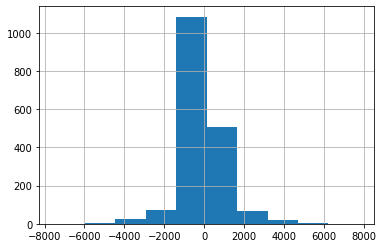

In [10]:
mutual["BTC_delta"].hist()

In [11]:
mutual

,Open_BTC,Open_ETH,Open_EUR,Open_Gold,Open_RealEstate,Open_NYSE,day_number,BTC_delta
0,4386.7,0.00,1.197800,1317.750000,735.060000,11733.800000,0,NaN
1,4587.5,0.00,1.197400,1309.260000,740.520000,11783.400000,1,200.8
2,4555.1,0.00,1.188400,1308.800000,744.620000,11833.900000,2,-32.4
3,4724.9,0.00,1.191100,1321.800000,743.290000,11898.000000,3,169.8
4,4834.9,0.00,1.190993,1330.801901,741.324566,11938.060484,4,110.0
...,...,...,...,...,...,...,...,...
1777,20856.0,1168.06,1.017300,1742.860000,668.200000,14642.300000,1777,-735.6
1778,19952.7,1095.73,1.004000,1733.990000,650.630000,14502.400000,1778,-903.3
1779,19349.6,1039.72,1.004000,1726.170000,661.500000,14395.000000,1779,-603.1
1780,20235.8,1114.20,1.006100,1735.700000,660.140000,14340.300000,1780,886.2


In [35]:
mutual["BTC_binary_delta"] = (mutual["BTC_delta"] > 0).astype(int)
mutual

,Open_BTC,Open_ETH,Open_EUR,Open_Gold,Open_RealEstate,Open_NYSE,day_number,BTC_delta,sliding_BTC,BTC_binary_delta
0,4386.7,0.00,1.197800,1317.750000,735.060000,11733.800000,0,NaN,NaN,0
1,4587.5,0.00,1.197400,1309.260000,740.520000,11783.400000,1,200.8,4487.10,1
2,4555.1,0.00,1.188400,1308.800000,744.620000,11833.900000,2,-32.4,4571.30,0
3,4724.9,0.00,1.191100,1321.800000,743.290000,11898.000000,3,169.8,4640.00,1
4,4834.9,0.00,1.190993,1330.801901,741.324566,11938.060484,4,110.0,4779.90,1
...,...,...,...,...,...,...,...,...,...,...
1777,20856.0,1168.06,1.017300,1742.860000,668.200000,14642.300000,1777,-735.6,21223.80,0
1778,19952.7,1095.73,1.004000,1733.990000,650.630000,14502.400000,1778,-903.3,20404.35,0
1779,19349.6,1039.72,1.004000,1726.170000,661.500000,14395.000000,1779,-603.1,19651.15,0
1780,20235.8,1114.20,1.006100,1735.700000,660.140000,14340.300000,1780,886.2,19792.70,1


In [38]:
mutual["BTC_binary_delta"].value_counts()

1    928
0    854
Name: BTC_binary_delta, dtype: int64

<AxesSubplot:>

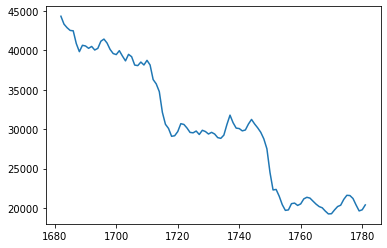

In [21]:
mutual["sliding_BTC"] = ( mutual["Open_BTC"] + mutual["Open_BTC"].shift(1) ) / 2
mutual["sliding_BTC"].iloc[-100:].plot()

In [20]:
from sklearn.preprocessing import StandardScaler

x_cols = ["sliding_BTC","Open_ETH","Open_EUR","Open_Gold","Open_RealEstate","Open_NYSE","day_number"]
y_cols = ["Open_BTC"]

y_data = mutual[y_cols].to_numpy()
x_data = mutual[x_cols].to_numpy()
print(x_data.shape)
print(y_data.shape)

(1782, 7)
(1782, 1)


In [24]:
from numpy.lib.stride_tricks import sliding_window_view

window_size=7
features = x_data.shape[-1]

windows = sliding_window_view(x_data, window_shape = (window_size,features))
windows = windows.reshape(windows.shape[0],windows.shape[2],windows.shape[3])

targets = y_data[window_size:]
windows = windows[:-1]

print(windows.shape)
print(targets.shape)

(1775, 7, 7)
(1775, 1)


In [25]:
test_ratio = 0.2
separator_index = round(len(windows)*0.2)
x_train = windows[:separator_index]
y_train = targets[:separator_index]

x_test = windows[separator_index:]
y_test = targets[separator_index:]

In [26]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = x_scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
Y_train = y_scaler.fit_transform(y_train)

X_test = x_scaler.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)
Y_test = y_scaler.transform(y_test)


In [28]:
from sklearn.metrics import mean_squared_error
class LastValuePredictor:

    def predict(self,X):
        return X[:,-1, 0]

last_value_preds = LastValuePredictor().predict(X_test[-30:])

last_value_preds_rescaled = y_scaler.inverse_transform(last_value_preds.reshape(-1,1))

mse = mean_squared_error(y_test[-30:],last_value_preds_rescaled)
print("mse:",mse)

mse: 573458.7818113862


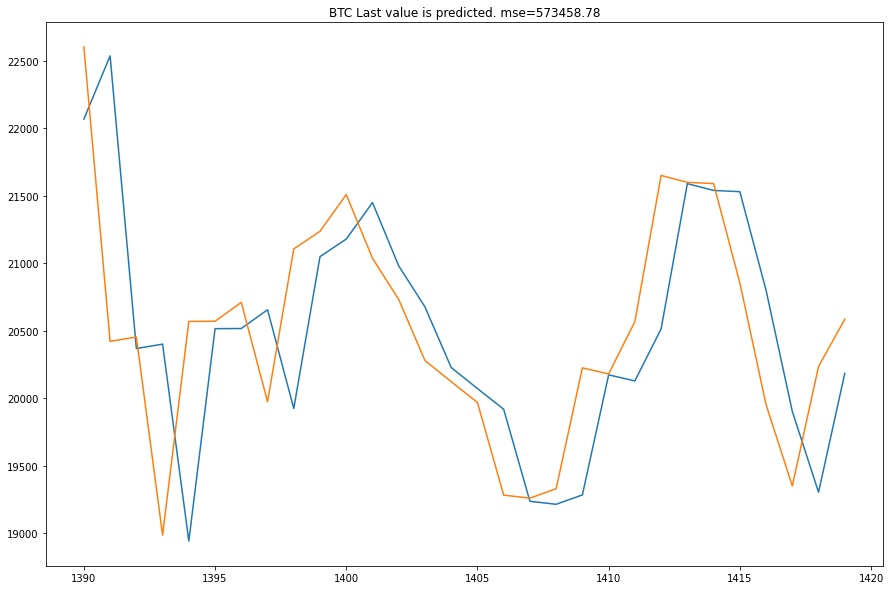

In [32]:
import matplotlib.pyplot as plt
time_axis = np.arange(0,len(y_test),1)

from matplotlib.pyplot import figure

figure(figsize=(15, 10))
plt.title(f"BTC Last value is predicted. mse={round(mse,2)}")
plt.plot(time_axis[-30:],last_value_preds_rescaled)
plt.plot(time_axis[-30:],y_test[-30:])
plt.show()

In [33]:
from keras.layers import Flatten, Dense
from tensorflow import keras
from keras import Sequential, Input

model = Sequential([
    Flatten(input_shape=(x_train.shape[-2],x_train.shape[-1])),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='relu')
])

model.compile(optimizer='Adam', loss='mse')
history = model.fit(X_train,Y_train,epochs=20, validation_split=0.2)

Epoch 1/20
9/9 [==============================] - 1s 20ms/step - loss: 1.1708 - val_loss: 0.3204
Epoch 2/20
9/9 [==============================] - 0s 4ms/step - loss: 1.1699 - val_loss: 0.3204
Epoch 3/20
9/9 [==============================] - 0s 4ms/step - loss: 1.1699 - val_loss: 0.3204
Epoch 4/20
9/9 [==============================] - 0s 4ms/step - loss: 1.1699 - val_loss: 0.3204
Epoch 5/20
9/9 [==============================] - 0s 4ms/step - loss: 1.1699 - val_loss: 0.3204
Epoch 6/20
9/9 [==============================] - 0s 4ms/step - loss: 1.1699 - val_loss: 0.3204
Epoch 7/20
9/9 [==============================] - 0s 4ms/step - loss: 1.1699 - val_loss: 0.3204
Epoch 8/20
9/9 [==============================] - 0s 4ms/step - loss: 1.1699 - val_loss: 0.3204
Epoch 9/20
9/9 [==============================] - 0s 4ms/step - loss: 1.1699 - val_loss: 0.3204
Epoch 10/20
9/9 [==============================] - 0s 4ms/step - loss: 1.1699 - val_loss: 0.3204
Epoch 11/20
9/9 [=====================

45/45 [==============================] - 0s 1ms/step


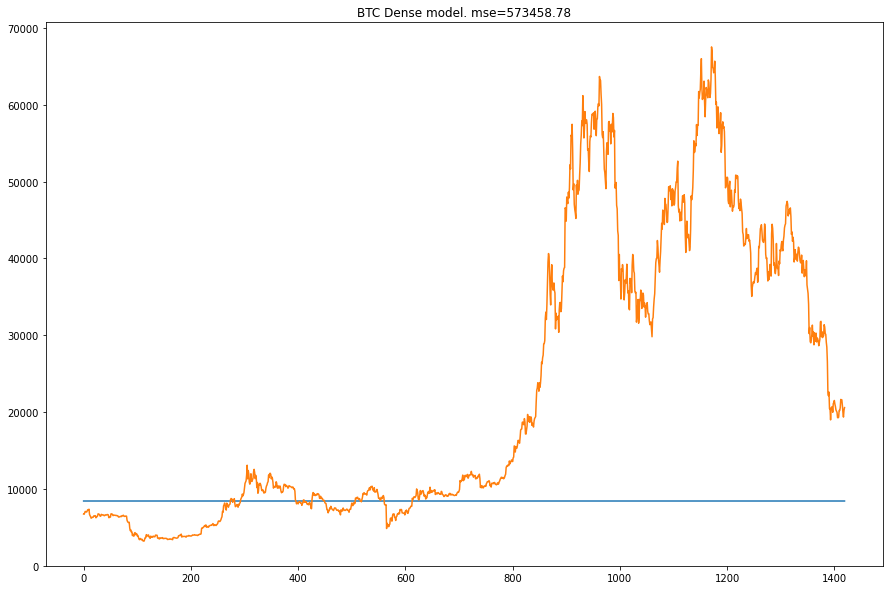

In [34]:
dense_model_preds = model.predict(X_test)
y_dense_model_preds_rescaled = y_scaler.inverse_transform(dense_model_preds)
mse_dense = mean_squared_error(y_test,y_dense_model_preds_rescaled)
figure(figsize=(15, 10))
plt.title(f"BTC Dense model. mse={round(mse,2)}")
plt.plot(time_axis,y_dense_model_preds_rescaled)
plt.plot(time_axis,y_test)
plt.show()